In [61]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from numpy import exp
import matplotlib.pyplot as plt 

In [49]:
df = pd.read_csv("gbm-data.csv")

In [50]:
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [51]:
target = df["Activity"]
data = df.drop("Activity", axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.8, random_state=241)

In [53]:
grbc = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241)

In [54]:
grbc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3199           17.93s
         2           1.2645           13.89s
         3           1.2170           13.18s
         4           1.1775           11.81s
         5           1.1404           11.37s
         6           1.1106           10.74s
         7           1.0844           10.55s
         8           1.0617           10.41s
         9           1.0411           10.07s
        10           1.0223            9.98s
        20           0.8864            8.92s
        30           0.7844            8.45s
        40           0.7176            7.90s
        50           0.6590            7.36s
        60           0.6120            6.94s
        70           0.5599            6.58s
        80           0.5242            6.15s
        90           0.4829            5.85s
       100           0.4473            5.46s
       200           0.2379            1.78s


GradientBoostingClassifier(n_estimators=250, random_state=241, verbose=True)

In [55]:
generator = grbc.staged_decision_function(X_test)

In [56]:
def sigmoid(y):
    return 1 / (1 + exp(-y))


def get_log_loss(model, x, y):
    return [log_loss(y_true=y, y_pred=[sigmoid(v) for v in y_pred]) for y_pred in model.staged_decision_function(x)]


def plot_loss(rate, train_loss, test_loss):
    plt.figure()
    plt.plot(train_loss, 'r')
    plt.plot(test_loss, 'g')
    plt.legend(['train', 'test'])

      Iter       Train Loss   Remaining Time 
         1           1.0190            7.98s
         2           0.9246            8.93s
         3           0.8491            8.57s
         4           0.7722            8.37s
         5           0.7069            8.23s
         6           0.6672            8.13s
         7           0.6394            8.33s
         8           0.5763            8.23s
         9           0.5599            8.14s
        10           0.5445            8.06s
        20           0.2747            8.00s
        30           0.1705            7.69s
        40           0.1039            7.60s
        50           0.0682            7.20s
        60           0.0464            6.74s
        70           0.0300            6.36s
        80           0.0198            5.98s
        90           0.0136            5.65s
       100           0.0099            5.28s
       200           0.0002            1.71s
      Iter       Train Loss   Remaining Time 
        

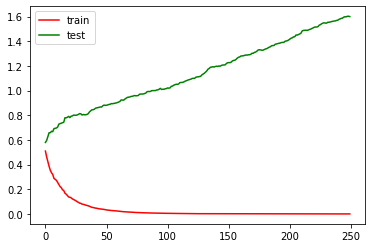

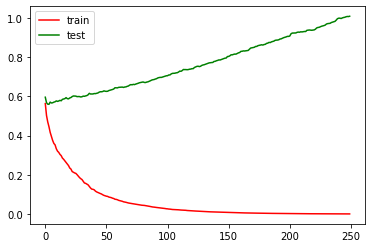

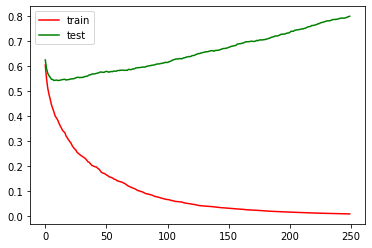

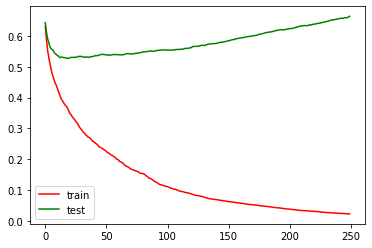

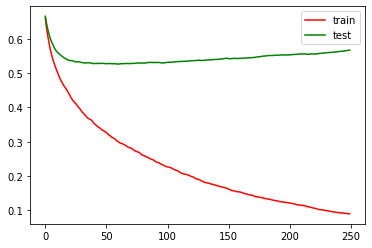

In [57]:
res = {}

for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, learning_rate=lr)
    clf.fit(X_train, y_train)

    log_loss_train = get_log_loss(clf, X_train, y_train)
    log_loss_test = get_log_loss(clf, X_test, y_test)
    plot_loss(lr, log_loss_train, log_loss_test)

    min_loss_test_value = min(log_loss_test)
    min_loss_test_index = log_loss_test.index(min_loss_test_value)
    res[lr] = [min_loss_test_index, min_loss_test_value]

print(res)

In [60]:
min_loss_index, min_loss_value = res[0.2]
print(min_loss_index, min_loss_value)

rf_clf = RandomForestClassifier(n_estimators=min_loss_index, random_state=241)
rf_clf.fit(X_train, y_train)
rf_test_loss = log_loss(y_true=y_test, y_pred=rf_clf.predict_proba(X_test)[:, 1])
print(rf_test_loss)

18 0.527170087866894
0.6041529435122166
